In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip" -d "/content/archive"


Streaming output truncated to the last 5000 lines.
  inflating: /content/archive/BK_2650.txt  
  inflating: /content/archive/BK_2670.jpeg  
  inflating: /content/archive/BK_2670.txt  
  inflating: /content/archive/BK_2680.jpeg  
  inflating: /content/archive/BK_2680.txt  
  inflating: /content/archive/BK_2700.jpeg  
  inflating: /content/archive/BK_2700.txt  
  inflating: /content/archive/BK_2710.jpeg  
  inflating: /content/archive/BK_2710.txt  
  inflating: /content/archive/BK_3160.jpeg  
  inflating: /content/archive/BK_3160.txt  
  inflating: /content/archive/BK_3170.jpeg  
  inflating: /content/archive/BK_3170.txt  
  inflating: /content/archive/BK_320.jpeg  
  inflating: /content/archive/BK_320.txt  
  inflating: /content/archive/BK_3240.jpeg  
  inflating: /content/archive/BK_3240.txt  
  inflating: /content/archive/BK_330.jpeg  
  inflating: /content/archive/BK_330.txt  
  inflating: /content/archive/BK_3690.jpeg  
  inflating: /content/archive/BK_3690.txt  
  inflating: /conte

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
import os

base_path = "/content/drive/archive"

folders = [
    "train/crack", "train/pothole", "train/normal",
    "test/crack", "test/pothole", "test/normal"
]

for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)
    print(f"Created: {path}")


Created: /content/drive/MyDrive/archive/train/crack
Created: /content/drive/MyDrive/archive/train/pothole
Created: /content/drive/MyDrive/archive/train/normal
Created: /content/drive/MyDrive/archive/test/crack
Created: /content/drive/MyDrive/archive/test/pothole
Created: /content/drive/MyDrive/archive/test/normal


In [ ]:
import os
import shutil

base_path = "/content/archive"
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")

categories = ["crack", "pothole", "normal"]
for category in categories:
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)

all_files = [f for f in os.listdir(base_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

for i, file in enumerate(all_files):
    src_path = os.path.join(base_path, file)

    if file.startswith("AA"):
        label = "crack"
    elif file.startswith("AB"):
        label = "pothole"
    elif file.startswith("AC"):
        label = "normal"
    else:
        continue

    if i % 5 == 0:
        dest = os.path.join(test_path, label, file)
    else:
        dest = os.path.join(train_path, label, file)

    shutil.move(src_path, dest)

print("✅ Dataset organized into train/ and test/ folders.")


✅ Dataset organized into train/ and test/ folders.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5803 - loss: 1.0794 - val_accuracy: 0.8718 - val_loss: 0.5948
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7955 - loss: 0.6112 - val_accuracy: 0.8718 - val_loss: 0.3866
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8417 - loss: 0.4857 - val_accuracy: 0.8718 - val_loss: 0.3543
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8184 - loss: 0.4799 - val_accuracy: 0.8718 - val_loss: 0.2904
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8118 - loss: 0.4574 - val_accuracy: 0.8718 - val_loss: 0.2412
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8757 - loss: 0.3170 - val_accuracy: 0.9231 - val_loss: 0.2979
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9238 - loss: 0.2852 - val_accuracy: 0.9231 - val_loss: 0.2180
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9163 - loss: 0.1838 - val_accuracy: 0.9487 - val_loss: 0.1402
Epoch 9/

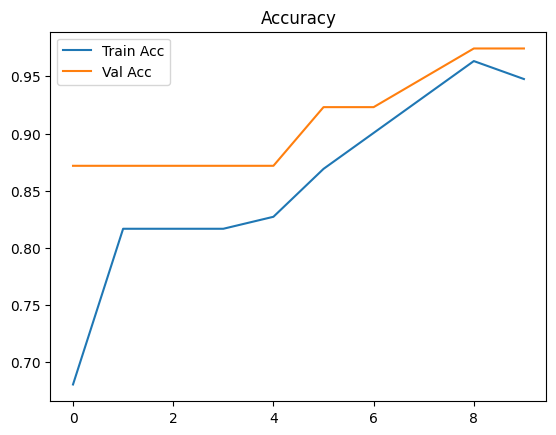

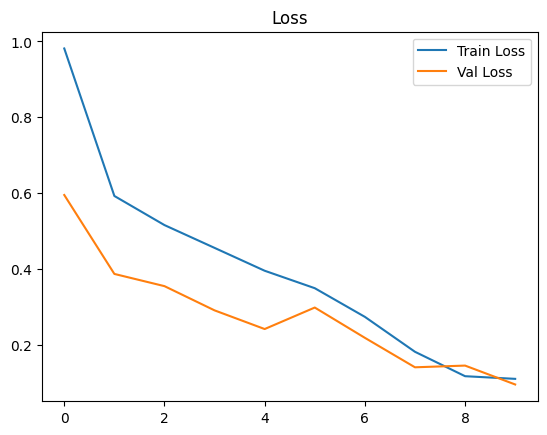

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()


Error: Could not load image at your_image.jpg
No damage detected.


Saving download (3).jpg to download (3).jpg
User uploaded file "download (3).jpg" with length 12488 bytes


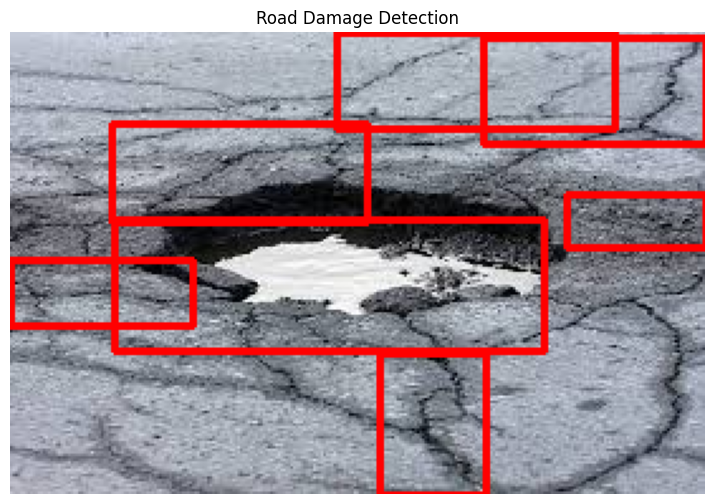

In [ ]:


import cv2
import matplotlib.pyplot as plt
import numpy as np

def detect_road_damage(image_path):


  img = cv2.imread(image_path)
  if img is None:
    print(f"Error: Could not load image at {image_path}")
    return None, None

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  edges = cv2.Canny(blurred, 50, 150)

  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  damage_regions = []
  for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

    if area > 100 and circularity < 0.8:
      x, y, w, h = cv2.boundingRect(contour)
      damage_regions.append((x, y, w, h))

      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
  plt.figure(figsize=(10, 6))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Road Damage Detection")
  plt.axis('off')
  plt.show()

  return damage_regions, img



image_path = 'your_image.jpg'
detected_regions, processed_image = detect_road_damage(image_path)


if detected_regions:
  print("Detected Damage Regions:")
  for x, y, w, h in detected_regions:
    print(f"  - x:{x}, y:{y}, w:{w}, h:{h}")
else:
  print("No damage detected.")


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

image_path = list(uploaded.keys())[0]
detected_regions, processed_image = detect_road_damage(image_path)
